In [ ]:
#importing labreries and loading the dataset
import tensorflow
from tensorflow.keras import datasets,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#reshaping and identifing the classes
ytrain=ytrain.reshape(-1, )
classname = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

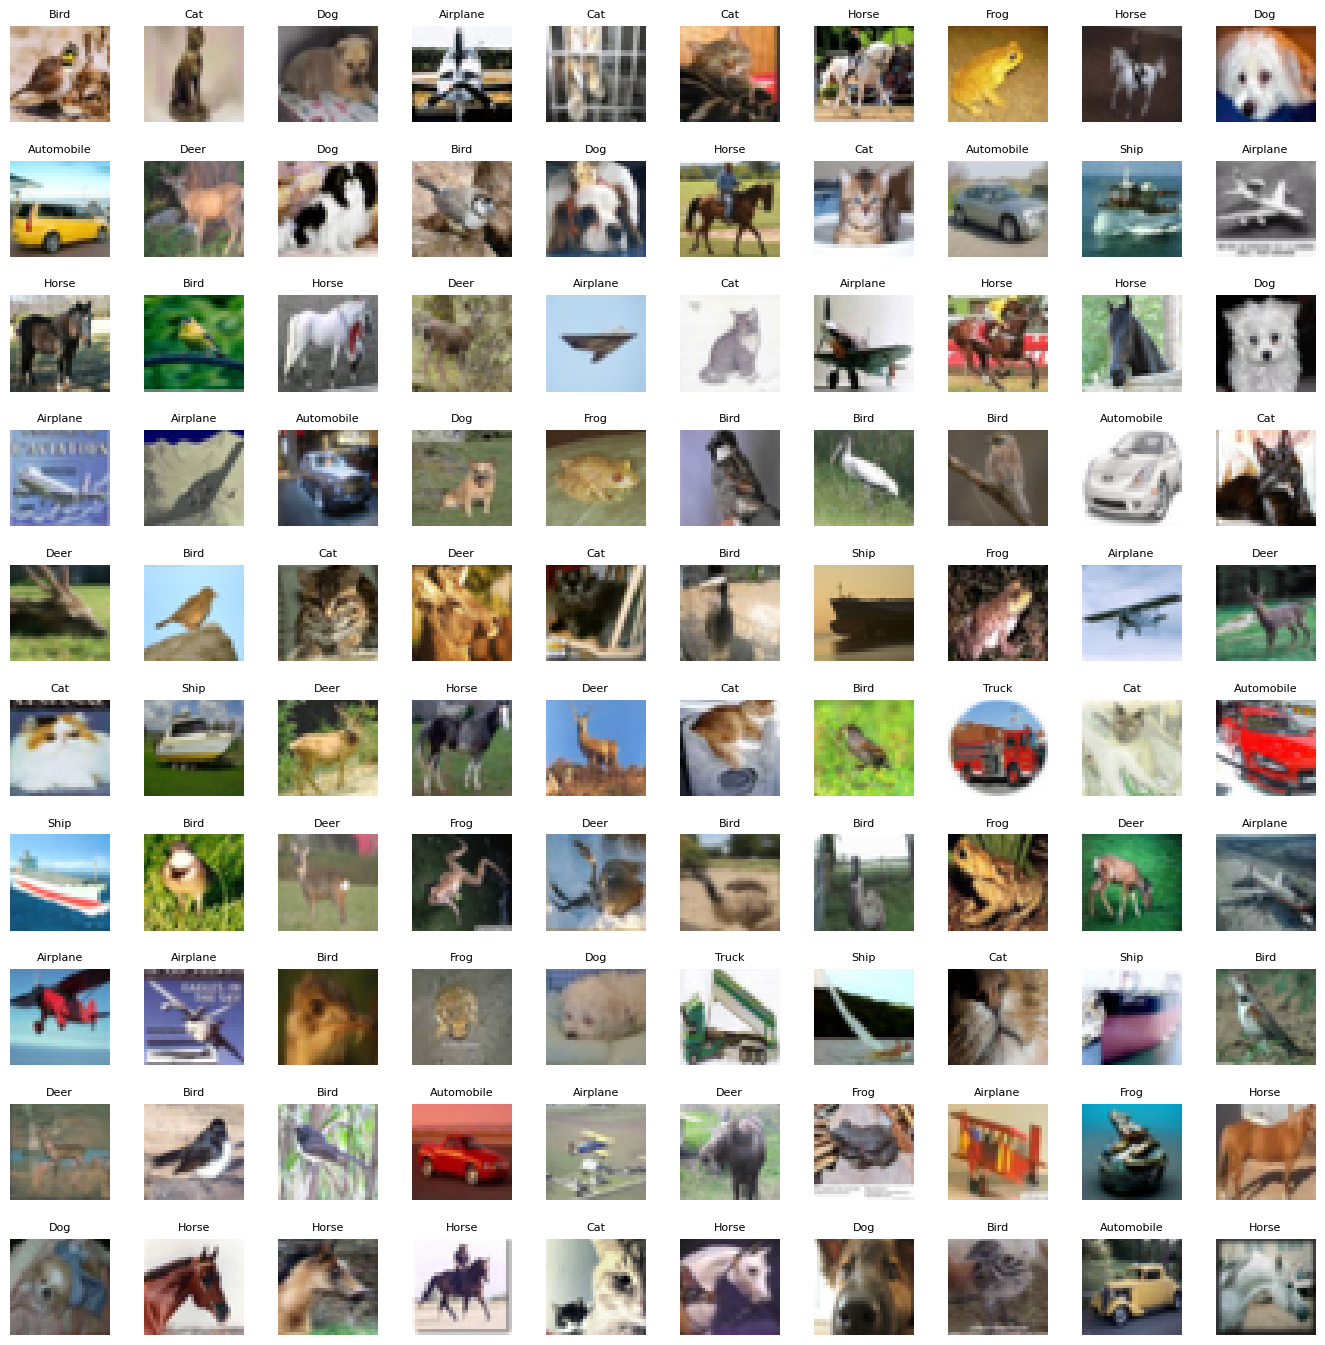

In [ ]:
#showing some pictures of the dataset
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(xtrain)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(xtrain[index,1:])
    label_index = int(ytrain[index])
    axes[i].set_title(classname[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
xtrain[2]

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]

In [ ]:
# Normalizing the images
xtrain = xtrain / 255.0
xtest = xtest / 255.0
ytrain = tensorflow.keras.utils.to_categorical(ytrain, 10)
ytest = tensorflow.keras.utils.to_categorical(ytest, 10)

In [ ]:
#creating the model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(4,4),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=34,activation="relu"))
model.add(Dense(units=10,activation="softmax"))


In [ ]:
#training the model
x=15
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(xtrain, ytrain,epochs=x,validation_data=(xtest, ytest))

Epoch 1/15
1563/1563 [==============================] - 98s 62ms/step - loss: 1.4797 - accuracy: 0.4726 - val_loss: 1.6270 - val_accuracy: 0.4126
Epoch 2/15
1563/1563 [==============================] - 99s 63ms/step - loss: 1.1653 - accuracy: 0.5904 - val_loss: 1.3494 - val_accuracy: 0.5361
Epoch 3/15
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0284 - accuracy: 0.6402 - val_loss: 1.0763 - val_accuracy: 0.6222
Epoch 4/15
1563/1563 [==============================] - 96s 61ms/step - loss: 0.9296 - accuracy: 0.6769 - val_loss: 1.0848 - val_accuracy: 0.6225
Epoch 5/15
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8516 - accuracy: 0.7045 - val_loss: 1.3241 - val_accuracy: 0.5592
Epoch 6/15
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7809 - accuracy: 0.7297 - val_loss: 1.3968 - val_accuracy: 0.5376
Epoch 7/15
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7230 - accuracy: 0.7489 - val_loss: 0.9709 

313/313 [==============================] - 5s 17ms/step


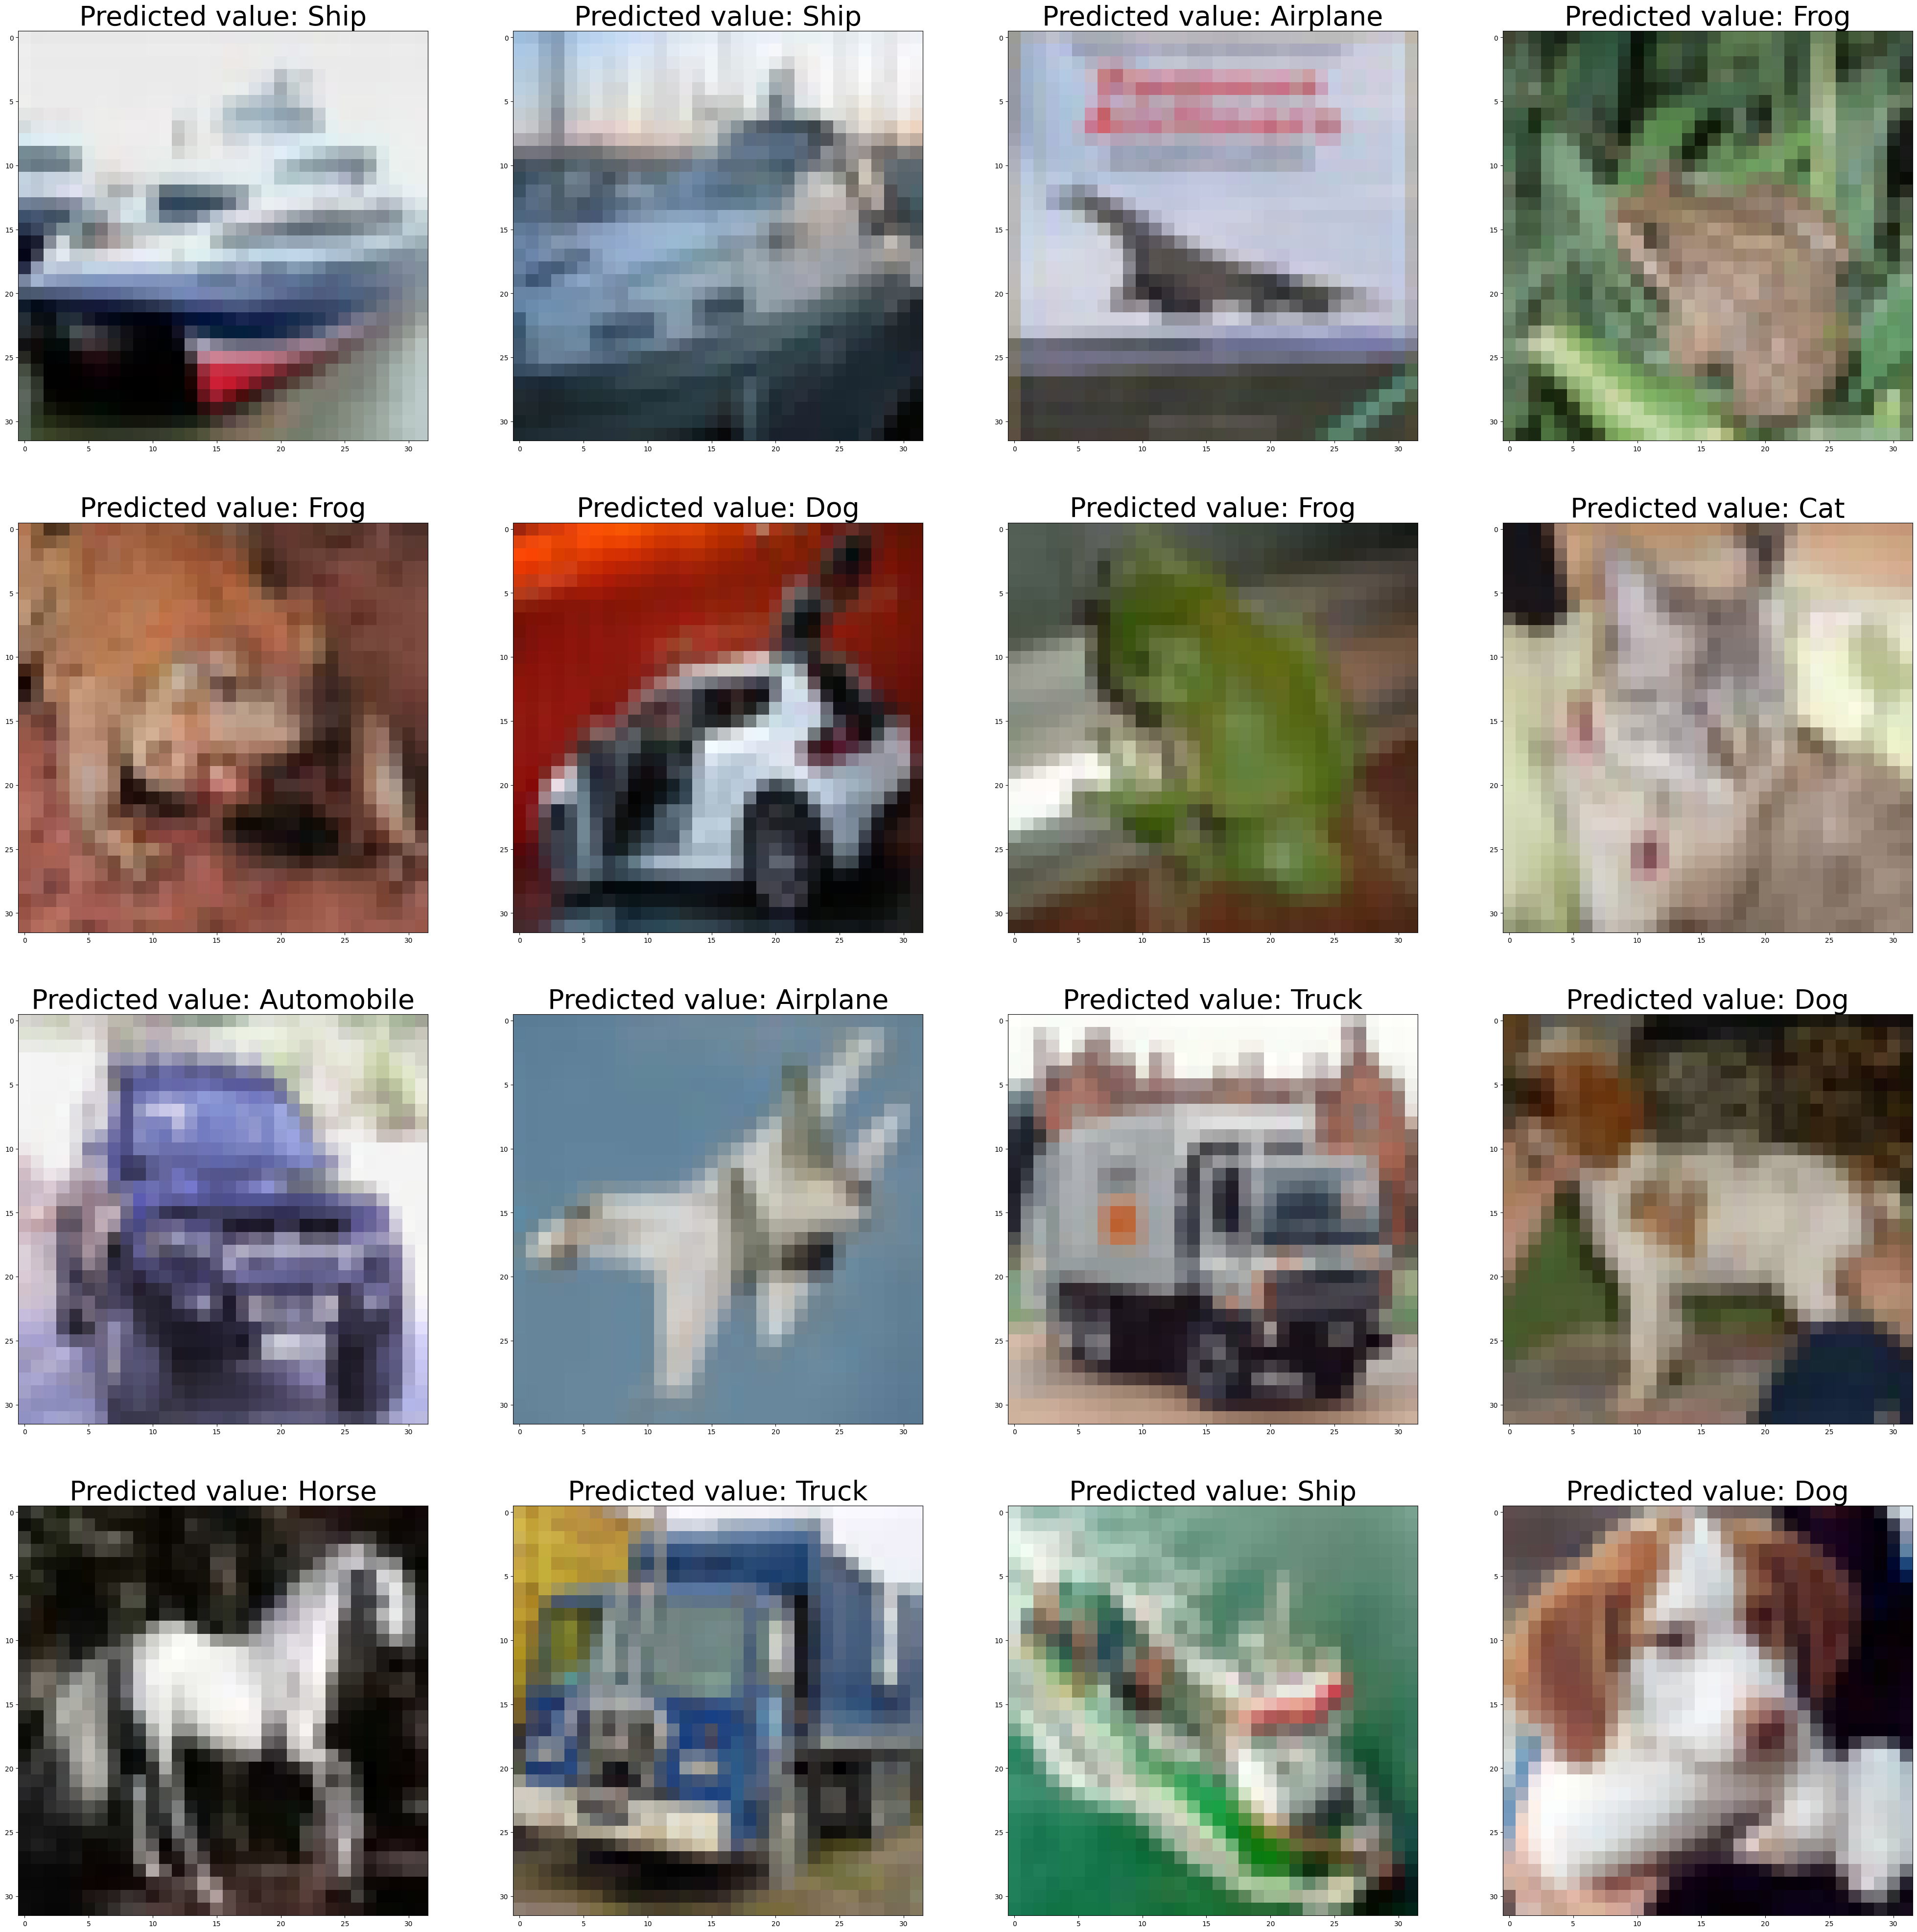

In [ ]:
#predicting the results and showing them
predictions = model.predict(xtest)

plt.figure(figsize=[50,50])

for i in range(1,17):
 plt.subplot(4,4,i)
 plt.imshow(xtest[i].reshape(32, 32, -1), cmap=plt.cm.binary)
 plt.title("Predicted value: " + str(classname[np.argmax(predictions[i], axis=0)]), size=40)
 plt.grid(False)

In [ ]:
# Evaluatint the model Performance:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(ytest, axis=1)


print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

313/313 [==============================] - 8s 24ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.83      0.76      0.79      1000
           2       0.53      0.62      0.57      1000
           3       0.53      0.47      0.50      1000
           4       0.62      0.61      0.62      1000
           5       0.70      0.41      0.51      1000
           6       0.73      0.79      0.76      1000
           7       0.75      0.70      0.72      1000
           8       0.69      0.83      0.76      1000
           9       0.69      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

Confusion Matrix:
[[746  18  50  11  19   3   3   6  91  53]
 [ 38 760   9   5   3   4   8   2  49 122]
 [ 68  12 618  50  79  33  57  31  31  21]
 [ 25  17 109 4

Interpretation:
The model seems to perform well on classes 1, 6, 7, and 8, as indicated by higher precision, recall, and F1-scores.
Classes 2, 3, 4, and 5 show relatively lower precision and recall, suggesting that the model struggles more with these classes.
The confusion matrix provides a more detailed breakdown of where the misclassifications are occurring.
